In [53]:
import sys,os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data.mimic.semi_synthetic_pipeline import MIMICSemiSyntheticDataPipeline
import omegaconf
from hydra.utils import instantiate, get_original_cwd
config_path = '../config/dataset/mimic_synthetic_debug.yaml'

In [56]:
args.dataset.seed

2025

In [57]:
args = omegaconf.OmegaConf.load(config_path)
args.dataset.seed = 2026
#initialize the pipeline
data_pipeline = instantiate(args.dataset)

c:\Users\mhr_k\OneDrive\Documents\Thesis\Neural-R-Learner\src\data\mimic\load_data.py:234: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_vitals = all_vitals.fillna(method='ffill')
c:\Users\mhr_k\OneDrive\Documents\Thesis\Neural-R-Learner\src\data\mimic\load_data.py:235: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_vitals = all_vitals.fillna(method='bfill')
100%|██████████| 50/50 [00:08<00:00,  5.63it/s]
c:\Users\mhr_k\OneDrive\Documents\Thesis\Neural-R-Learner\src\data\mimic\semi_synthetic_pipeline.py:121: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  self.all_vitals = self.all_vitals.uns

In [3]:
import numpy as np
T_intv_disc, T_intv_cont = np.ones((3, 2)), None
T_base_disc, T_base_cont = np.zeros((3, 2)), None
gt_te = data_pipeline.compute_treatment_effect('test', T_intv_disc, T_intv_cont, T_base_disc, T_base_cont)

100%|██████████| 2/2 [00:00<00:00, 23.83it/s]


In [4]:
gt_te

array([[-4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269],
       [-4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269, -4.11202269, -4.11202269,
        -4.11202269, -4.11202269, -4.11202269]])

In [7]:
true_effects = data_pipeline.true_effect
gt_te2= (np.flip(true_effects, axis=0) * (T_intv_disc - T_base_disc)).sum()

In [8]:
gt_te2

-4.112022690677112

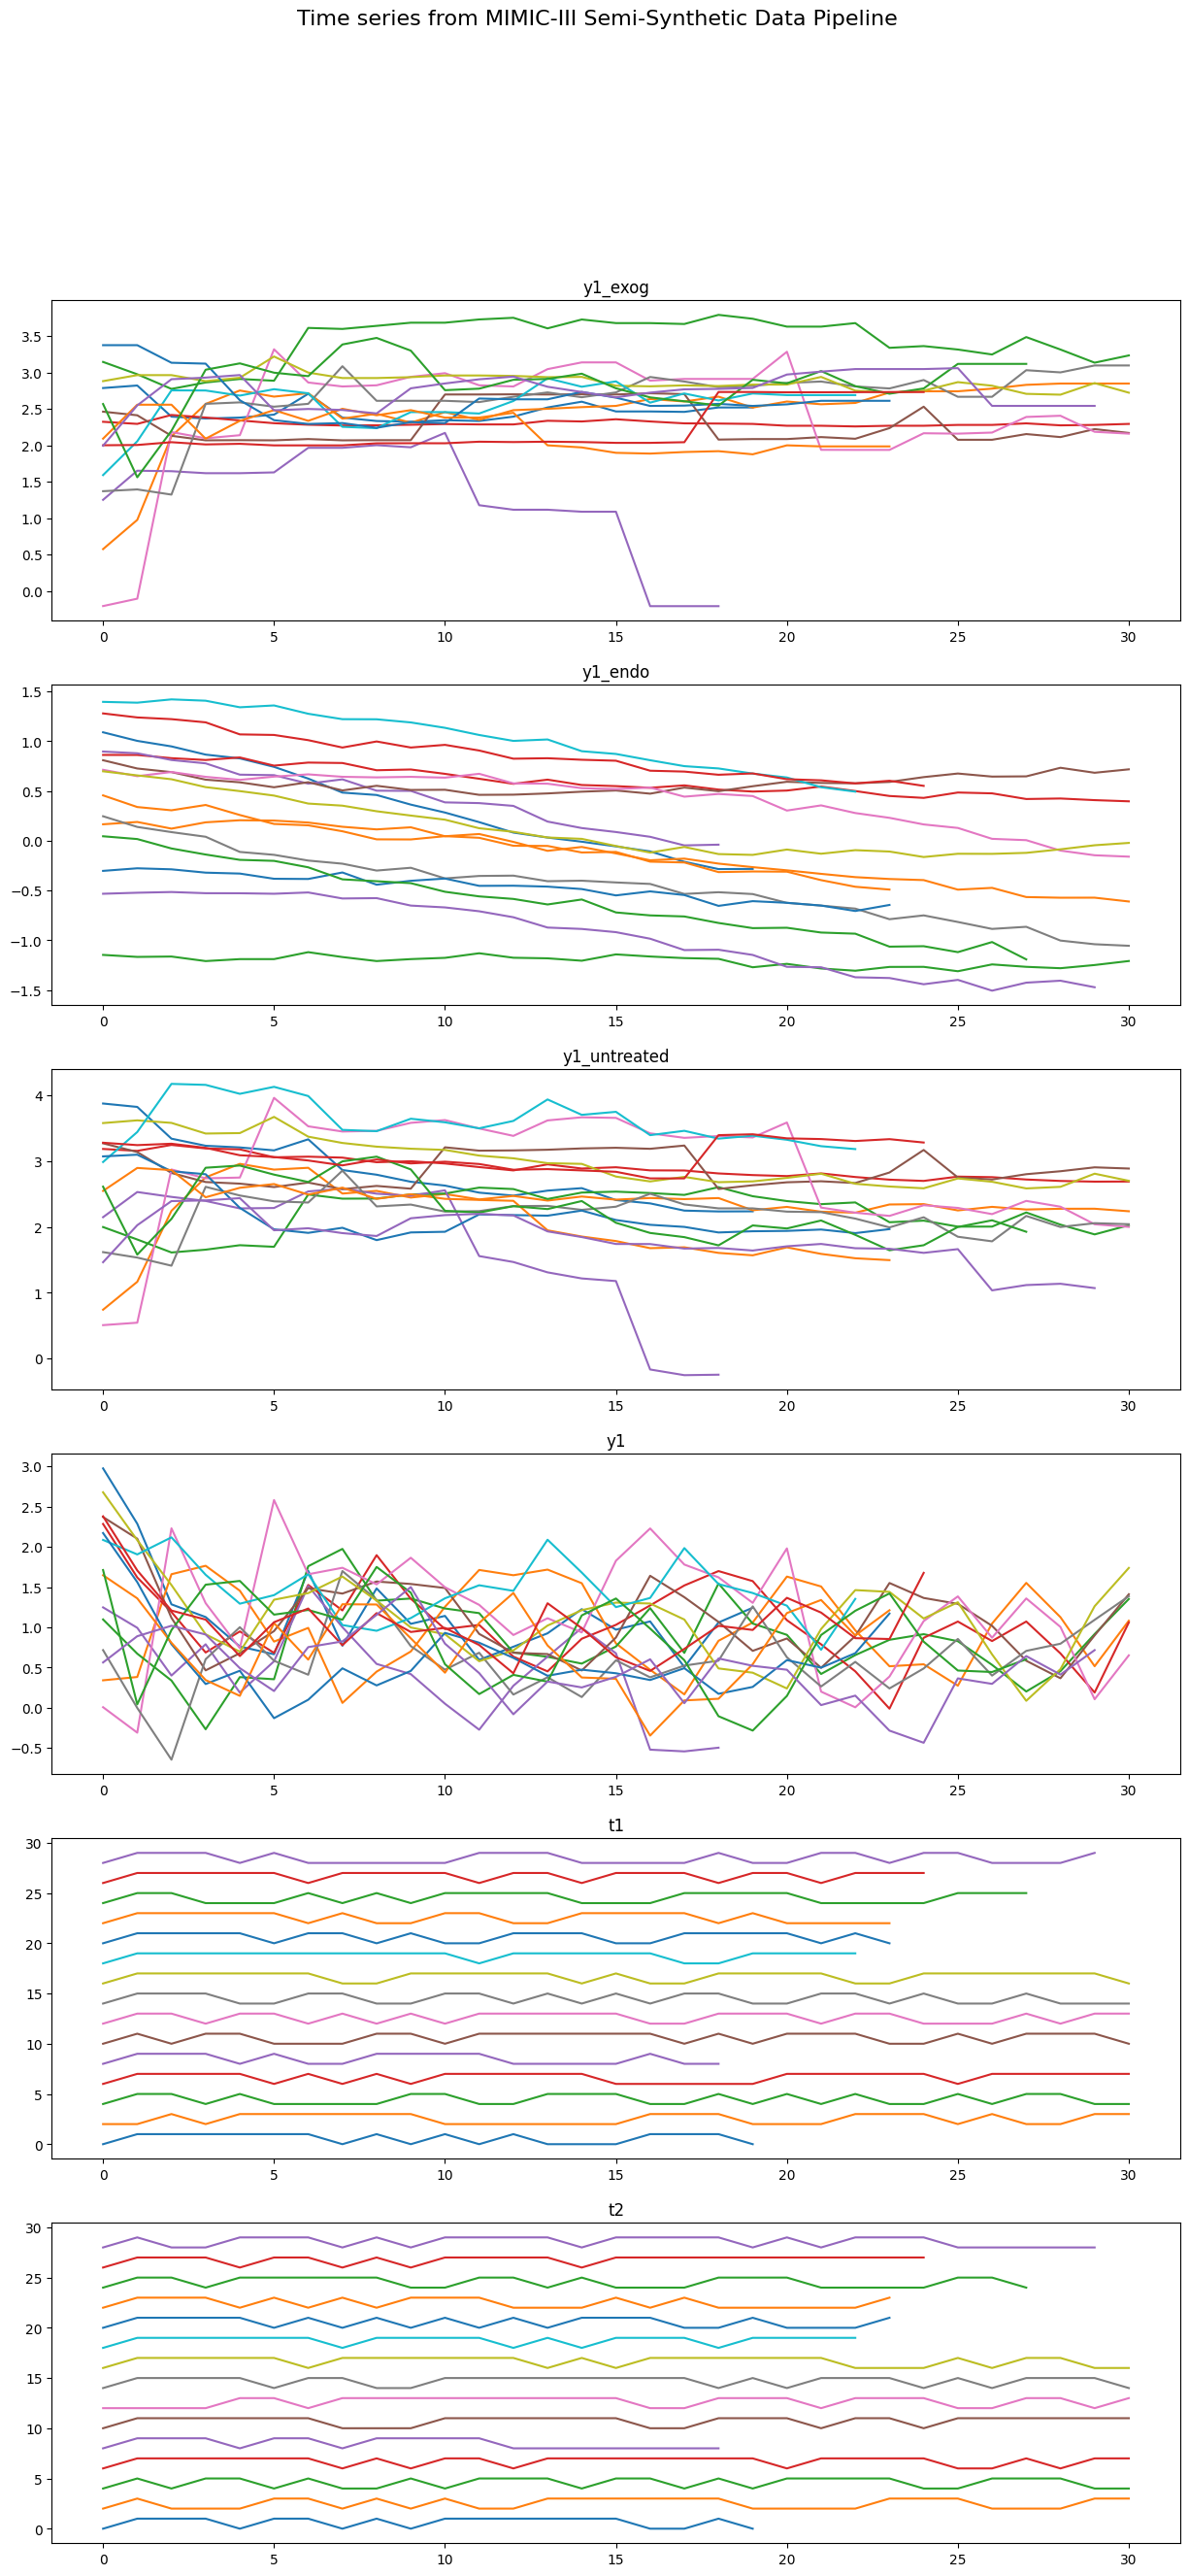

In [58]:
data_pipeline.plot_timeseries(n_patients = 15)

In [5]:
gt_te.shape

(200, 28)

In [6]:
data_pipeline

{'dataset': <src.data.mimic.semi_synthetic_pipeline.MIMICSemiSyntheticDataPipeline object at 0x000002A7D7DE34C0>, 'exp': {'exp_name': 'mimic-synthetic-debug-first-step', 'batch_size': 2, 'num_workers': 1, 'plot_residual': True}}